# Scikit-learn Random Forest

In [1]:
from timeit import default_timer as timer
from sklearn import metrics
from IPython.display import HTML
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from DataScience.connection import create_snowflake_session

from sklearn.ensemble import RandomForestRegressor

import matplotlib.pyplot as plt
import numpy as np
import joblib
import os
import logging

In [2]:
session = create_snowflake_session()

In [7]:
x, y = make_regression(n_samples=5000, n_features=100, n_informative=10, random_state=42)

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=72)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(3500, 100) (1500, 100) (3500,) (1500,)


In [9]:
# Shrink for experimental use case
x_train = x_train[:1000]
y_train= y_train[:1000]

In [11]:
params = {"n_estimators": 25, "random_state": 44, "n_jobs": -1}

In [13]:
start = timer()
rf = RandomForestRegressor(**params).fit(x_train, y_train)
train_patched = timer() - start
print(f"Scikit-learn time: {train_patched:.2f} s")

Scikit-learn time: 0.27 s


In [14]:
y_pred = rf.predict(x_test[:1000])
mse_opt = metrics.mean_squared_error(y_test[:1000], y_pred[:1000])
print(f"Scikit-learn Mean Squared Error: {mse_opt}")
display(rf)

Scikit-learn Mean Squared Error: 7891.402092231406


RandomForestRegressor(n_estimators=25, n_jobs=-1, random_state=44)

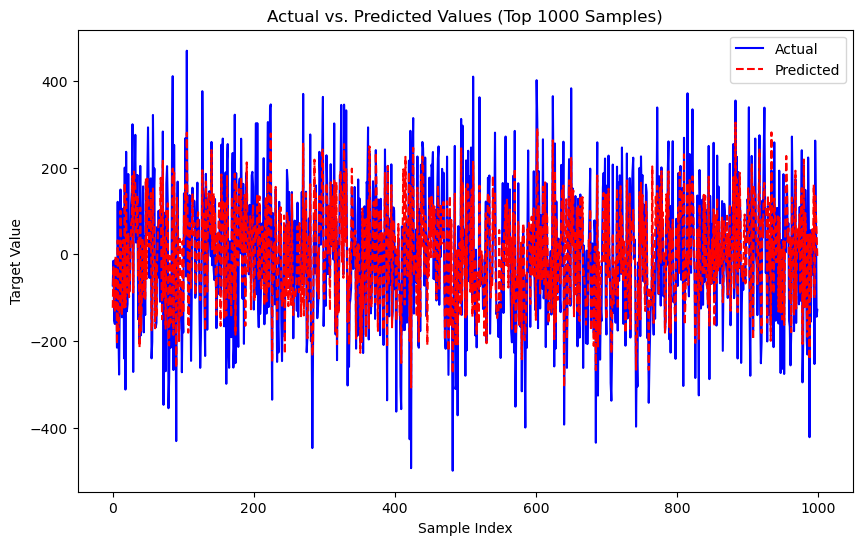

In [15]:
actual_sorted = y_test[:1000]
predicted_sorted = y_pred

plt.figure(figsize=(10, 6))
plt.plot(actual_sorted, label='Actual', color='blue')
plt.plot(predicted_sorted, label='Predicted', color='red', linestyle='--')
plt.xlabel('Sample Index')
plt.ylabel('Target Value')
plt.title('Actual vs. Predicted Values (Top 1000 Samples)')
plt.legend()
plt.show()

In [ ]:
joblib.dump(rf, './ml_model.joblib')
session.file.put("ml_model.joblib", "@CONTAINER_DEMO_DB.PUBLIC.RDF_MODEL", auto_compress=False, overwrite=True)
os.unlink('./ml_model.joblib')

In [ ]:
session.sql(" ls @CONTAINER_DEMO_DB.PUBLIC.RDF_MODEL/").collect()